# BLOCK 8: ABOUT HOW YOU FEEL

## Frequency of different Feelings

To explore the frequency of different emotions the survey includes one questions which contains a list of feelings and emotions and they are asked to identify how often they have felt these emotions in the last two weeks. Later, the kids are provided with a table with levels from 0 to 10 and are asked to mark one value. It is explained that 0 represents that you have not felt this emotion in the last two weeks and 10 you have felt it all the time.  An extract from question 45 of the oiginal survey si presented. ![Extract from question 45 of the oiginal survey](../viz/q45.png)

The first step will be to represent the results of the question.

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
sns.set(style='white')

# LOAD FUNCTIONS
%run useful_functions.ipynb

In [2]:
# Feelings analysis 
cols = ['Codi_Districte_Educatiu','Nom_Districte_Educatiu', 'f_felicitat', 'f_energia','f_calma', 'f_avorriment','f_estres','f_tristesa']
f_freq = df[cols].copy()
f_freq = f_freq.dropna()

feelings = cols[::-1][:-2]
levels = ['NC']+[str(n) for n in range(0,11)]

def f_dataprep(f_freq, ret_dic=True, codi=0, codi_var=''):
    # Creating a dictionary with the levels to generate stacked bar
    dic = {level:[] for level in levels}

    # Creating a dataframe with the levels for bokeh
    df_ = pd.DataFrame(index=levels, columns=feelings)
    df_ = df_.fillna(np.nan)

   
    for feeling in feelings:
        if codi == 0: 
            ratio = f_freq[feeling].value_counts(normalize=True)*100
            for level in levels: 
                dic[level].append(ratio[level])
                df_[feeling] = ratio

        else:
            ratio = f_freq[f_freq[codi_var] == codi][feeling].value_counts(normalize=True)*100
            for level in ratio.index: 
                dic[level].append(ratio[level])
                df_[feeling] = ratio

    if ret_dic:
        return(dic)
    else:
        return(df_)

In [3]:
# Plot Labels
feelings_names = ["SAD", "STRESSED", "BORED","CALM", "ENERGETIC", "HAPPY"]
f_labels={}
for cat_e,eng_e in zip(feelings,feelings_names):
    f_labels[cat_e]=eng_e

In [4]:
def f_sbar_plot(dic): 
    # Plotting Feeling frequencies:
    plt.figure(figsize=(18, 10))
    # plt.rcParams['figure.dpi'] = 600
    axes = []

    # Aggregating each feeling level:
    cum_size = np.zeros(len(feelings))
    i=0
    for level ,row_data in zip(dic.keys(),dic.values()):
        axes.append(plt.barh(feelings_names, row_data, left=cum_size,
                                label=level, color=colors_rgba[i]))
        cum_size += row_data
        i +=1

    ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks(np.arange(0,101,20))
    plt.legend(bbox_to_anchor=(0.5,0.95), loc="lower center", ncol=len(levels), frameon=False, fontsize='medium',
    title = "                    Never                                                                                                                                                           All the time")
    # ax.legend(bbox_to_anchor=(0.5,0.95), loc="lower center", ncol=len(levels), frameon=False, fontsize='medium')

    # plt.ylabel("Feelings", fontsize=16)
    plt.xlabel("Ratio of answers per level", fontsize=16)
    plt.suptitle("How often did you have this feeling during the last two weeks?", fontsize=22)

    # plt.savefig('f_sbar.png', bbox_inches='tight')
    plt.show()

In [5]:
# f_dict.values()

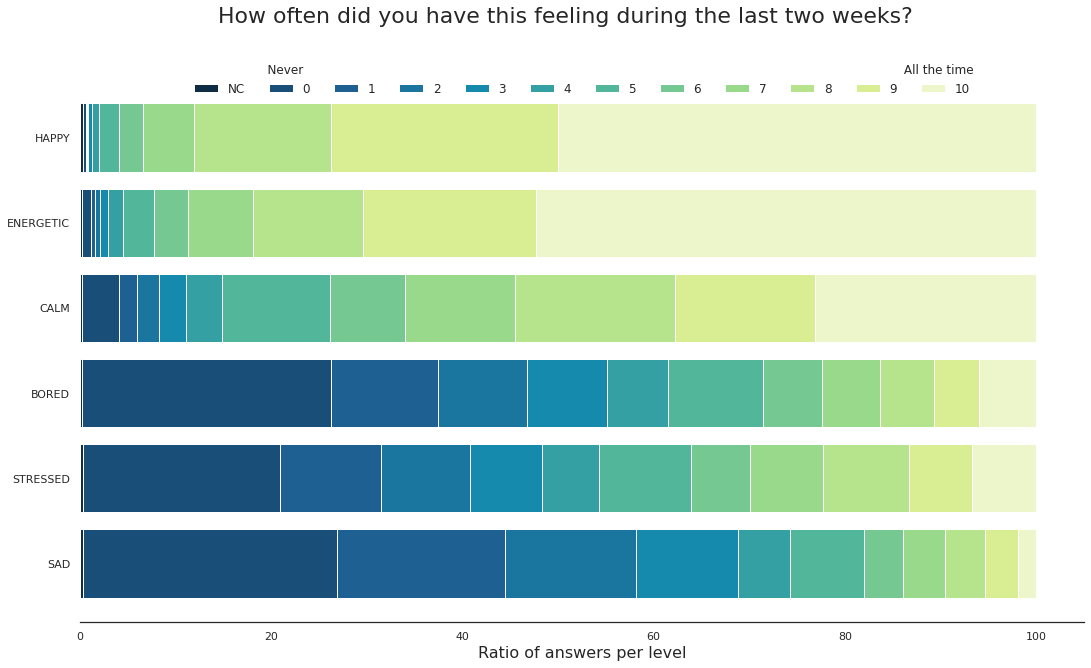

In [6]:
f_dict = f_dataprep(f_freq, ret_dic=True)
f_sbar_plot(f_dict)

The feelings are plot together and the levels are evaluated with stack bar that works as a gradient colormap. By inpecting the colors is possible to appreciate the importance of extrem answers. An extreme anser as _All the time_ is often selected and the presence of _Never_ is as well substantial (reaching values around 20% on the most negative feelings). This tendency to select the extreme answers can be related with the fact that we are working with kids between ages 10 to 12 and the characterized sensibilty of adults is not yet completley developed.[ADD REFERENCE - carlota?]()

In fact when looking at surveys from teenagers and adults it is possible to see a change on this tendency [Centre d'estudis d'Opinió: Valors socials i polítics a Catalunya. 2015 REO 798. Generalitat de
Catalunya.](https://ceo.gencat.cat/ca/estudis/registre-estudis-dopinio/estudis-dopinio-ceo/societat/detall/index.html?id=5509)

--> We could present this difference when studying satisfaction


However, it will be specially important to not look only on the extreme answers but understand the details of each feeling distribution:

In [7]:
def f_dist_plot(df_):
    df_ = df_.rename(columns=f_labels)
    feelings_names = ["SAD", "STRESSED", "BORED","HAPPY","CALM", "ENERGETIC"]

    fig,axs = plt.subplots(ncols=2, nrows=1, figsize=(16,6), sharex= True, sharey= True)
    plt.subplots_adjust(wspace=0.6, hspace=0.01)

    df_.loc[:,feelings_names[3:]].plot(ax=axs[0], lw=2.5, fontsize=12, style={'CALM': '--c', 'ENERGETIC': ':c', 'HAPPY': 'b'})
    df_.loc[:,feelings_names[:3]].plot(ax=axs[1], lw=2.5, fontsize=12, style={'BORED': ':c', 'STRESSED': '--c', 'SAD': 'b'})

    for ax in axs:
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)

        ax.grid(axis='y', color='#eee9e9', linestyle='dotted', linewidth=1.5)
        ax.legend(bbox_to_anchor=(1,1), loc="upper left", frameon=False, fontsize='medium')
        ax.set_xlabel("Frequency levels", fontsize=14)
        ax.set_ylabel("Ratio of answers (%)", fontsize=14)
        # ax.legend(frameon=False, fontsize='medium')

    plt.suptitle("Feelings Frequency Distribution", fontsize=18)

    # plt.savefig('f_dist.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

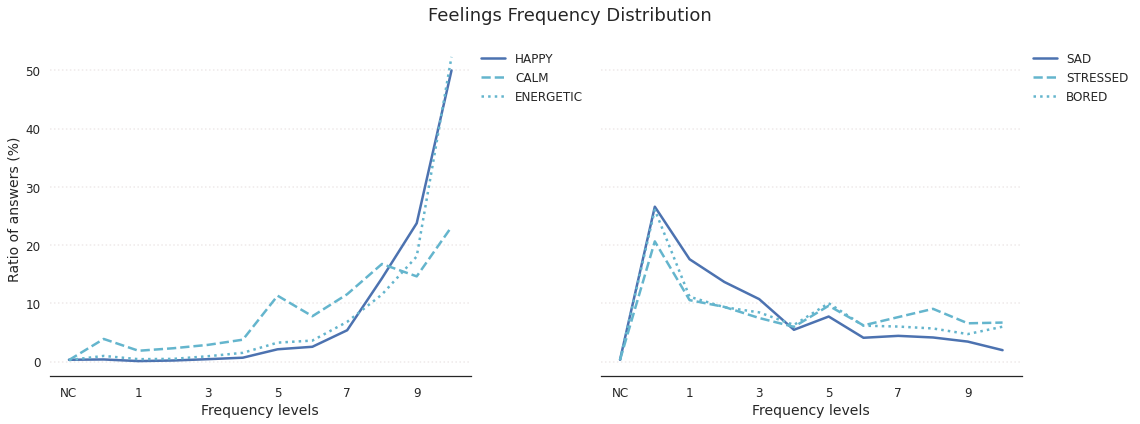

In [8]:
f_df = f_dataprep(f_freq, ret_dic=False, codi=0)
f_dist_plot(f_df)

Ciutat Vella


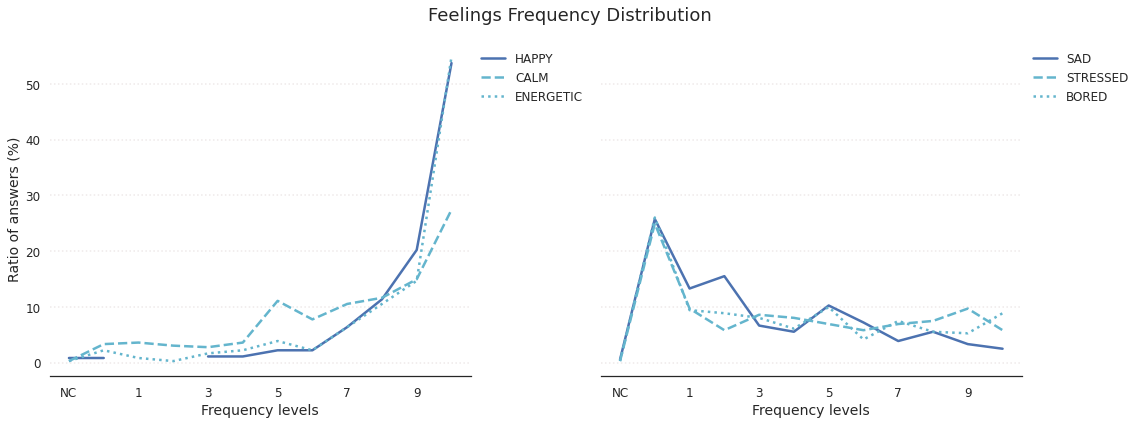

L'Eixample


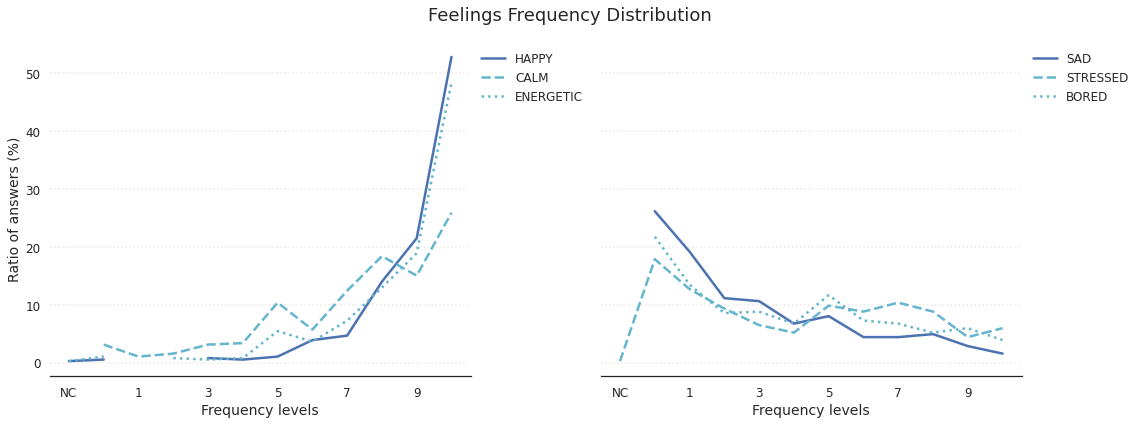

In [9]:
dic_codi = dic_codi_dist(df_t)
for codi in range(1,3):
    f_df = f_dataprep(f_freq, ret_dic=False, codi=codi, codi_var= 'Codi_Districte_Educatiu')
    print(dic_codi[codi])
    f_dist_plot(f_df)

In [10]:
def f_dist_plot1(df_):
    df_ = df_.rename(columns=f_labels)
    pairs = [['HAPPY','SAD'],['CALM','STRESSED'], ['ENERGETIC','BORED']]

    fig,axs = plt.subplots(ncols=3, nrows=1, figsize=(20,5), sharey=True, sharex=True)
    for ax,pair in zip(axs,pairs):
        df_.loc[:,pair[0]].plot(ax=ax, kind='bar', fontsize=12, color=colors[3], width=1)
        df_.loc[:,pair[1]].plot(ax=ax, kind='bar', fontsize=12, color=colors[0], alpha = 0.8, width=1)

        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)

        ax.grid(axis='y', color='#eee9e9', linestyle='dotted', linewidth=1.5)
        ax.legend(bbox_to_anchor=(0.5,0.95), loc="lower center", ncol=2, frameon=False, fontsize='medium')
        
        ax.set_xlabel("Frequency levels", fontsize=14)
        ax.set_ylabel("Ratio of answers (%)", fontsize=14)
        ax.tick_params(axis='x', labelrotation = 0)

    plt.suptitle("Feelings Frequency Distribution", fontsize=18)

    # plt.savefig('f_dist.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

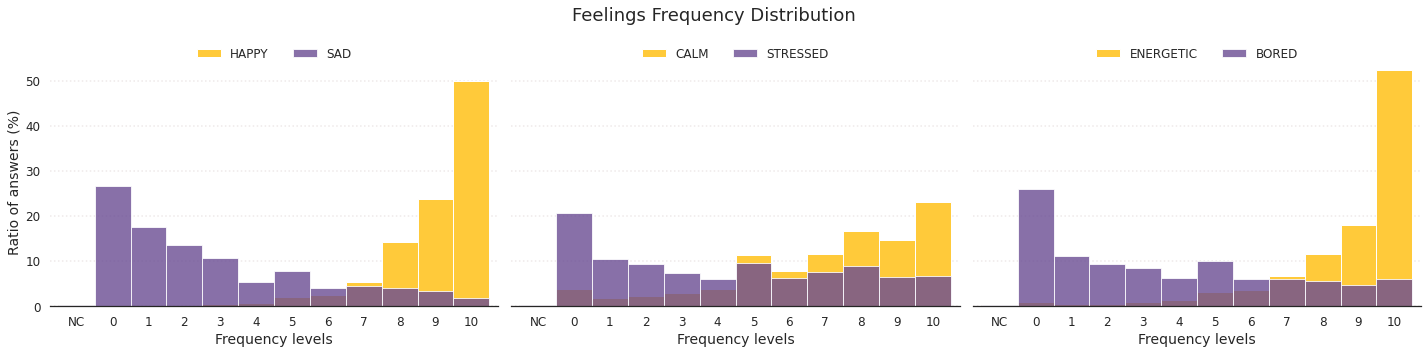

In [11]:
f_df_ = f_dataprep(f_freq, ret_dic=False, codi=0)
f_dist_plot1(f_df_)

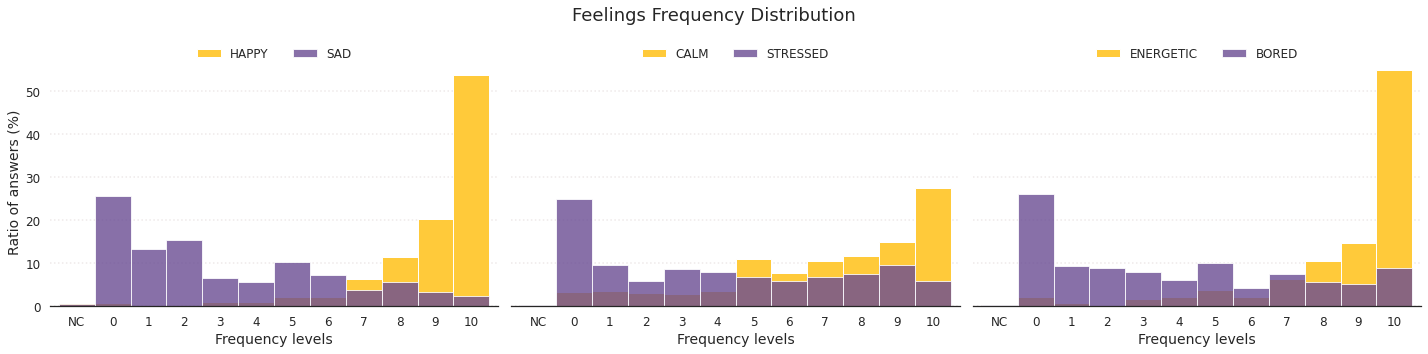

In [12]:
f_df_ = f_dataprep(f_freq, ret_dic=False, codi=1, codi_var= 'Codi_Districte_Educatiu')
f_dist_plot1(f_df_)

In [13]:
for c in range(0,1):
    f_df_ = f_dataprep(f_freq, ret_dic=False, codi=c, codi_var= 'Codi_Districte_Educatiu')
    f_df_.to_csv(str(c)+'-feelings.csv')

By looking at the distributions it is possible to appreciate that the peak is more pronounced in the positive felings than in the negative ones. With around 50% of the children marking that they felt _Happy_ and _Energetic_, _"All the time"_. In fact only 2% of kids marked a level of 4 or less in Happiness, nontheless even if the ratio is low it should not be overlooked since this represents that approximetley 80 of the kids surveyed are rarely feeling happy.

The peak for the rest of the feelings falls within the 20%-30% range, with _Calm_ reassembling more the behaviour of the negative feelings (with a mirrored distributi). It is as well possible to see a peak on the answers at level 5, which falls in the moddle of the distrobution. This behaviour is not strange, since could reflect the kids that were more hesitant.

When evaluating the negative feelings it is possible see that the tail of the distribution is flatter. This represents that even if kids will generally say that they experience _Happiness_ _"All the time"_, 14% of them will experience _Sadness_ _"Usually"_, marking it with a level of 7 or above. The same is observed with _Stress_ and _Boredom_, which reaches a porportion of 30% and 22% respectivley, in the same frequency level. 

This highlights that is specially important to look at the demographics that represent each frequency level, specially on the negative feelings. Therfore the next step will be to study how the different demographics are distributed: 

RADIAL GRAPHS WITH DIFFERENT ATTRIBUTES.

HOW CAN WE DEEP DIVE ON STRESS AND BORDEOM?

In [14]:
f_df_

,f_tristesa,f_estres,f_avorriment,f_calma,f_energia,f_felicitat
NC,0.304105,0.304105,0.228079,0.253421,0.253421,0.304105
0,26.583882,20.628485,26.051698,3.877344,0.963001,0.354790
1,17.562088,10.542321,11.125190,1.849975,0.405474,0.076026
2,13.659402,9.376584,9.325900,2.280791,0.456158,0.177395
3,10.719716,7.475925,8.438925,2.863659,0.912316,0.405474
4,5.448555,5.955398,6.284845,3.750634,1.495185,0.658895
5,7.729346,9.579321,10.010137,11.302585,3.243791,2.103396
6,4.080081,6.208819,6.158135,7.780030,3.598581,2.534212
7,4.409529,7.627978,6.006082,11.556006,6.817030,5.372529
8,4.130765,9.047136,5.676635,16.751140,11.505322,14.292955


## Life Satisfaction

In [15]:
# Life Satisfaction analysis 
cols = ['Codi_Districte_Educatiu','SLSSmc']
df_sat = df_t[cols].copy()
df_sat = df_sat.dropna()
df_sat.head()

,Codi_Districte_Educatiu,SLSSmc
0,8,"A lot [90, 100]"
1,8,"Enough [70, 89]"
2,8,"Enough [70, 89]"
3,8,"A lot [90, 100]"
4,8,"A lot [90, 100]"


In [16]:
df_ = df_t.copy()
att_name = 'Codi_Districte_Educatiu'

def sat_dataprep(df_, att_name):
    cols = [att_name, 'SLSSmc']
    df_sat = df_[cols].copy()
    df_sat = df_sat.dropna()

    lab = list(df_sat['SLSSmc'].unique())
    lab_new= ['Very','Fairly', 'Slightly', 'Not at all', 'NC']

    df_sat['Satisf'] = pd.Categorical(df_sat['SLSSmc'].replace(lab,lab_new),
         categories = lab_new, ordered=True)
    df_sat.pop('SLSSmc')  

    att_ = np.sort(df_sat[att_name].unique())
    levels = df_sat['Satisf'].unique()

    mtrx = []
    for att in att_:
        df_att = df_sat.loc[df_sat[att_name]==att].value_counts(normalize=True)*100
        df_att= df_att.reset_index().rename(columns={0: 'Ratio'})
        mtrx.append(list(df_att['Ratio']))
    
    return(mtrx,lab_new, att_)

In [17]:
def s_bar_plot(mtrx, level, attr, attr_label='', fig_tup=(16, 10), title = False): 
    plt.figure(figsize=fig_tup)
    # plt.rcParams['figure.dpi'] = 400
    axes = []

    # Aggregating each feeling level:
    cum_size = np.zeros(len(attr))
    i=0
    for lev_, lev_data in zip(level, np.transpose(mtrx)):
        axes.append(plt.barh(attr, lev_data, left=cum_size,
                                label=lev_, color=colors2[i]))
        cum_size += lev_data
        i +=1

    ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks(np.arange(0,101,20))
    ax.legend(bbox_to_anchor=(0.5,0.95), loc="lower center", ncol=len(level), frameon=False, fontsize='medium')
    plt.tick_params(labelsize=14, pad=6)

    plt.ylabel(attr_label, fontsize=16)
    plt.xlabel("Ratio of answers per level", fontsize=16)
    if title:
        plt.title("To what extent are you satisfied with your life?", fontsize=22, y=1.03)

    plt.tight_layout()
    # plt.savefig('f_sbar.png', bbox_inches='tight')
    plt.show()

In [18]:
def m_att_resize(m,lev,att):
    m_ = m.copy()
    att_ = att.copy()
    # print("att", len(att))
    for i in range(len(m)):
        # print(i, m[i], len(lev)>len(m[i]))
        if len(lev)>len(m[i]):
            m_.remove(m[i])
            j, = np.where(att_ == att[i]) 
            att_ = np.delete(att_, j)

    return(m_,att_)

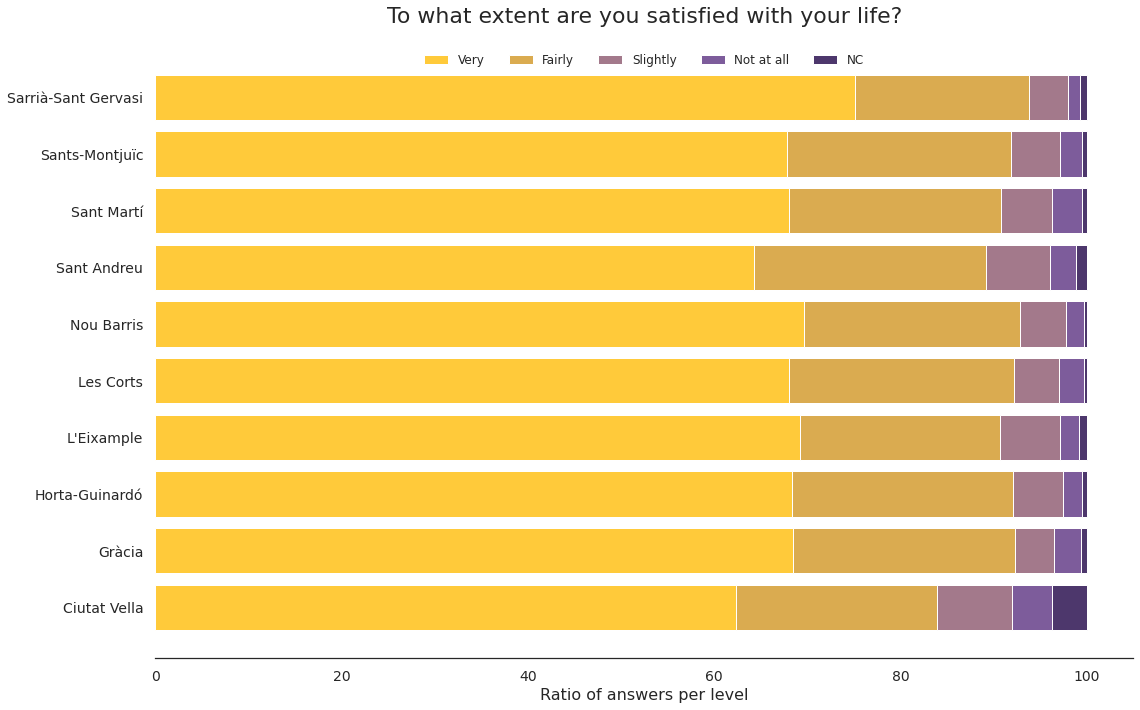

In [19]:
df_ = df_t.copy()
att_name = 'Nom_Districte_Educatiu'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
s_bar_plot(m_,lev,att_, title=True)

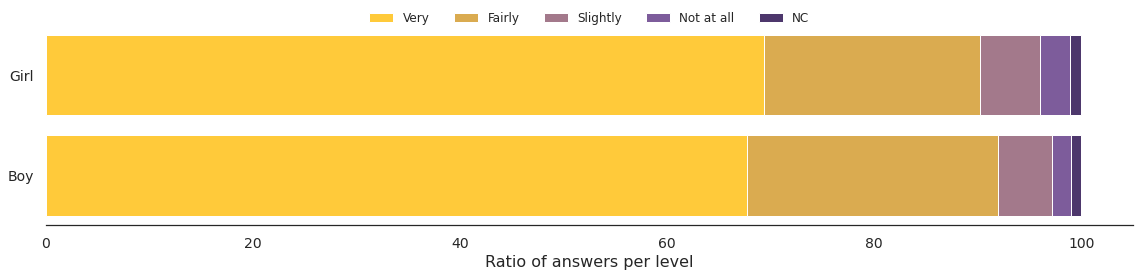

In [20]:
df_ = df_t.copy()
att_name = 'Sexe'
m,lev,att = sat_dataprep(df_, att_name) 
m_, att_ = m_att_resize(m,lev,att)
s_bar_plot(m_,lev,att_, fig_tup=(16, 4))

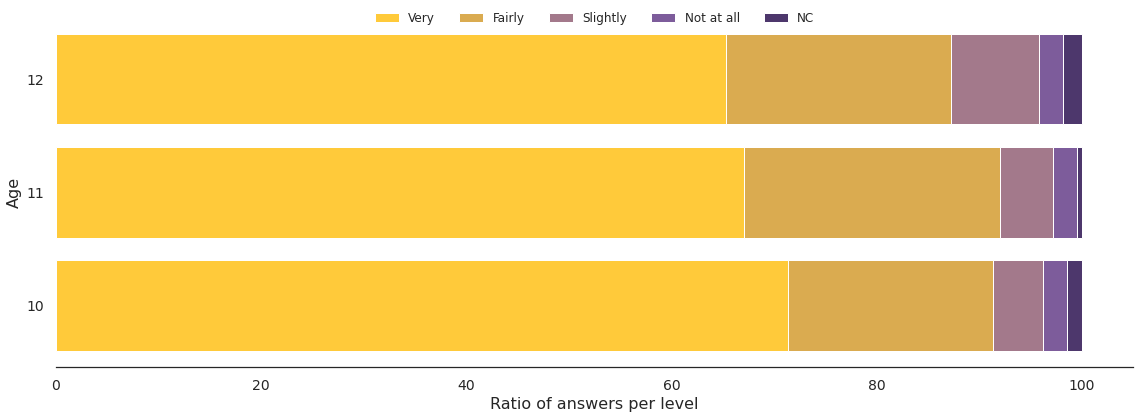

In [21]:
att_name = 'Edat'
m,lev,att = sat_dataprep(df_, att_name) 

m_, att_ = m_att_resize(m,lev,att)
s_bar_plot(m_,lev,att_, fig_tup=(16, 6), attr_label="Age")

## Additional Attributes

In [22]:
# TEST to include histogram next to stacked bar
# import matplotlib.image as mpimg
# # img = np.uint8(mpimg.imread('sat_ERFD.png'))

# from PIL import Image
# img = Image.open('../viz/sat_ERFD.png')

# fig_tup = (12,8)
# fig, ax = plt.subplots(figsize=fig_tup)
# imgplot=plt.imshow(img)
# plt.show()

In [23]:
def att_bar_plot(df_, att_name, att_, att_lab='', fig_tup = (12,8)):

    fig, ax = plt.subplots(figsize=fig_tup)

    # Number of kids surveyed by ATTRIBUTE
    att_count = [(df_[att_name] == x).sum() for x in att_]

    ax.barh(att_, att_count, color=colors2[-1])
    ax.tick_params(labelsize=14, pad=6)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    ax.set_xlabel('Counts', size=16, labelpad = 12)
    plt.suptitle(att_lab, fontsize=20, y=0.94, x=0.6)
    plt.tight_layout()
    plt.show()


# att_bar_plot(df_, att_name, att_[:3], fig_tup = (4,4))

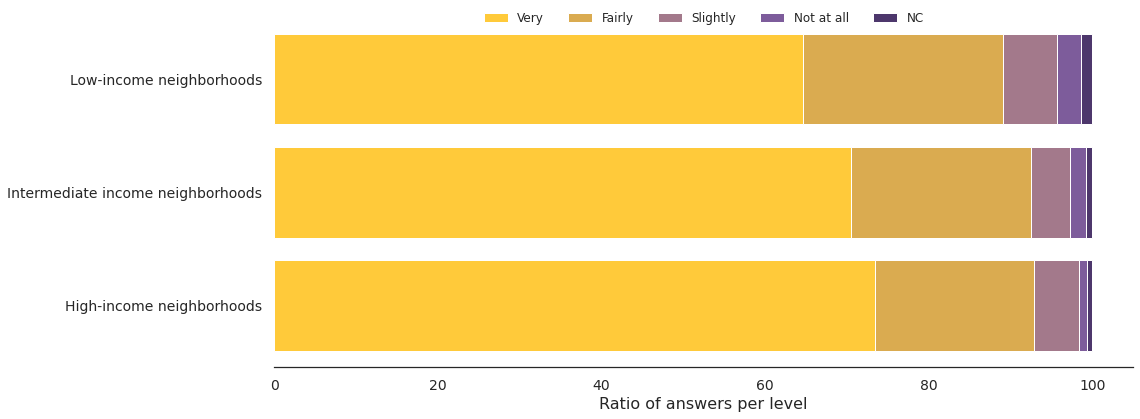

In [24]:
att_name = 'ERFDbllp'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)

# Removing the neighbourhoods outside BCN
s_plot = s_bar_plot(m_[:3],lev,att_[:3], fig_tup=(16, 6)) 

# plt.savefig('sat_ERFD.png', bbox_inches='tight')

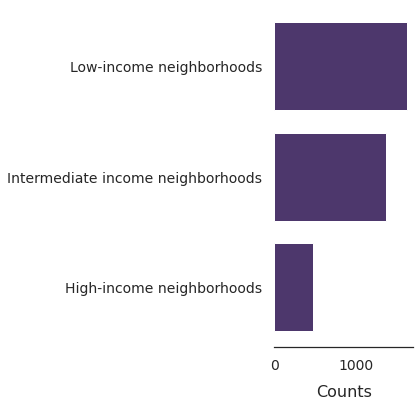

In [25]:
# stacked_vars(df_, att_name, colors, "Income Level", leg='r')
att_bar_plot(df_, att_name, att_[:3], fig_tup = (6,6))

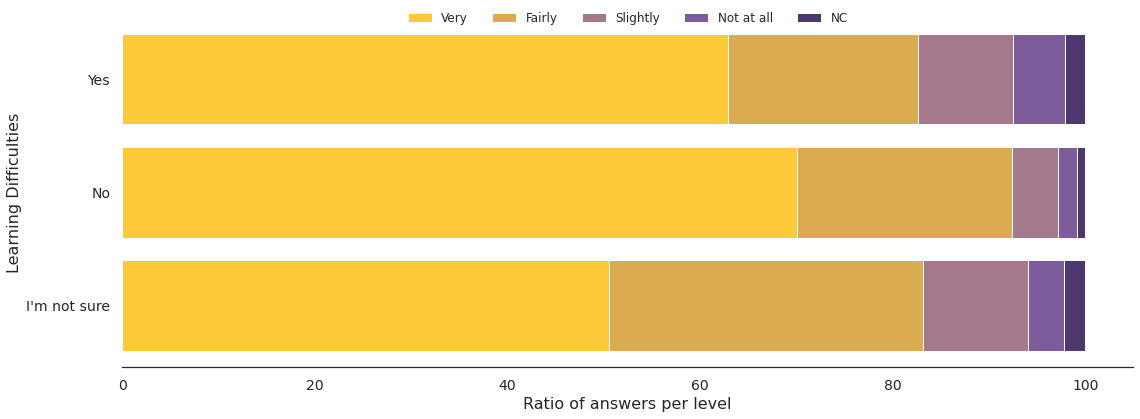

In [45]:
att_name = 'dificultat_aprenentatge'
attr_label="Learning Difficulties"
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 6))

att_ = np.append(att_[0], att_[2:])
m_ = [m_[0]]+m_[2:]
s_bar_plot(m_,lev,att_,fig_tup=(16, 6), attr_label=attr_label)

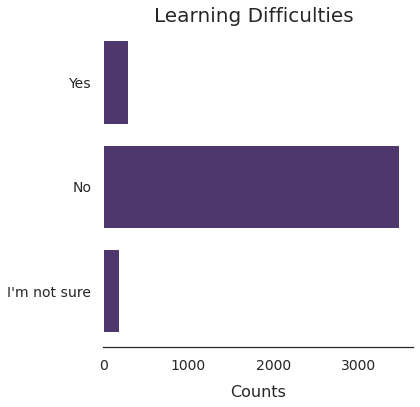

In [27]:
# stacked_vars(df_, att_name, colors, "Learning Difficulties", leg='top')
att_bar_plot(df_, att_name, att_[:3], fig_tup = (6,6), att_lab= attr_label)

In [46]:
[(df_[att_name] == x).sum() for x in att_]

[184, 3472, 294]

In [47]:
(184+294)/(3472+184+294)

0.1210126582278481

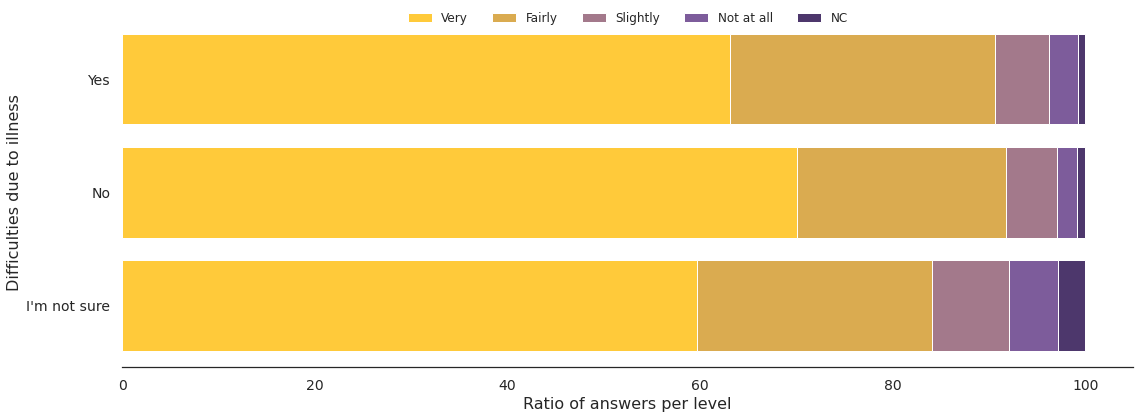

In [29]:
att_name = 'dificultat_per_malaltia'
attr_label="Difficulties due to illness"

m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 6))

att_ = np.append(att_[0], att_[2:])
m_ = [m_[0]]+m_[2:]
s_bar_plot(m_,lev,att_,fig_tup=(16, 6), attr_label=attr_label)

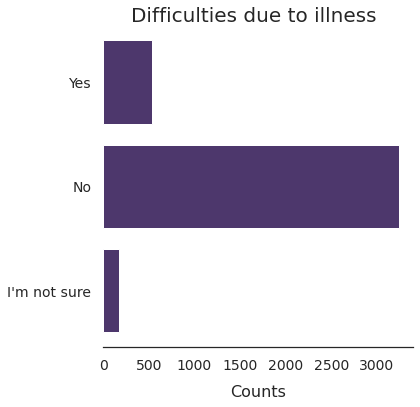

In [30]:
# stacked_vars(df_, att_name, colors, "Illness", leg='top')
att_bar_plot(df_, att_name, att_, fig_tup = (6,6), att_lab=attr_label)

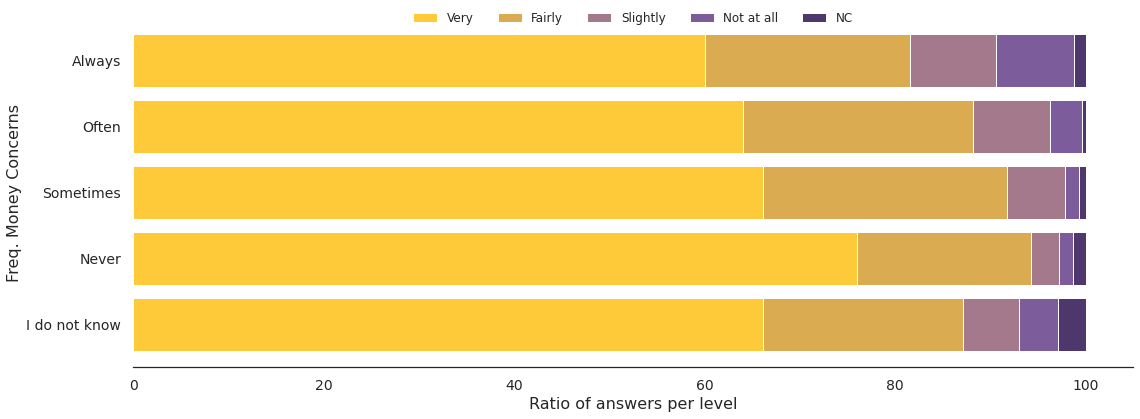

In [31]:
# How often are you concerned about the money your family has?
att_name = 'preocupacio_diners'
attr_label = 'Freq. Money Concerns'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 6))

att_ = np.append(np.append(att_[0], att_[3:]), att_[1:3][::-1])
m_ = [m_[0]] + m_[3:] + m_[1:3][::-1]
s_bar_plot(m_[::-1],lev,att_[::-1],fig_tup=(16, 6), attr_label=attr_label)

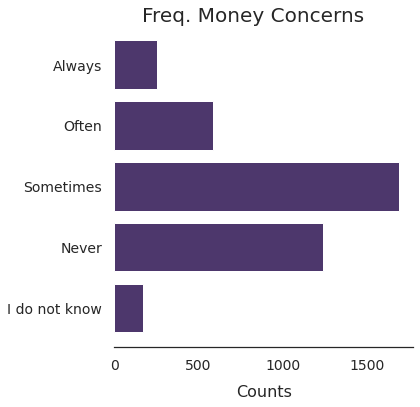

In [32]:
# stacked_vars(df_, att_name, colors, "Freq. Money Concerns", leg='top')
att_bar_plot(df_, att_name, att_[::-1], fig_tup = (6,6), att_lab = attr_label)

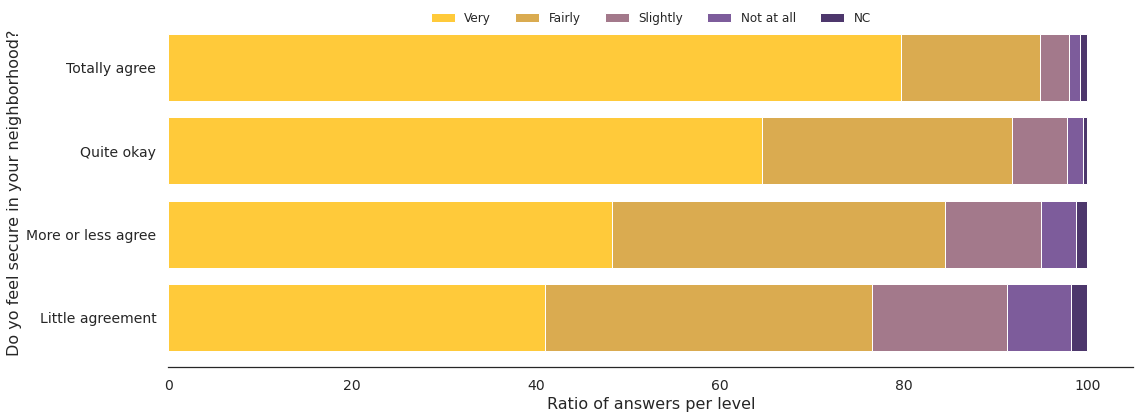

In [33]:
# MOVE TO NEW PLOT :   MAPS
att_name = 'b_seguretat'
attr_label="Do yo feel secure in your neighborhood?"
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
s_bar_plot(m_,lev,att_, fig_tup=(16, 6), attr_label=attr_label)

# m
# att_ = np.append(att[0], att[2:])
# m_ = [m[0]]+m[2:]
# s_bar_plot(m_,lev,att_,fig_tup=(16, 6), attr_label="Learning Difficulties")

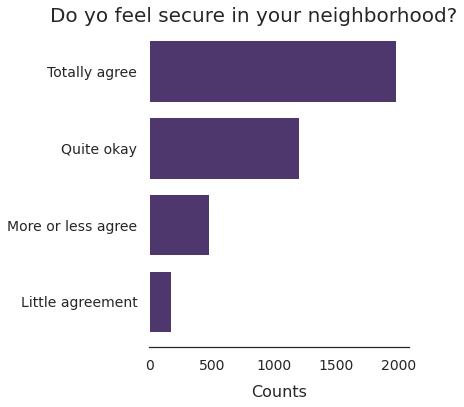

In [34]:
att_bar_plot(df_, att_name, att_, fig_tup = (6,6), att_lab = attr_label)

In [35]:
print(df_t.b_seguretat.unique())
print(df.b_seguretat.unique())

['Quite okay' 'Little agreement' 'More or less agree' 'Totally agree'
 'People agree' nan 'I do not know' 'NC']
["Bastant d'acord" "Poc d'acord" "Més o menys d'acord" "Totalment d'acord"
 "Gens d'acord" nan 'No ho sé' 'NC']


In [36]:
# att_name = 'amb_qui_vius'
# m,lev,att = sat_dataprep(df_, att_name) 
# print(lev)
# print(att)
# m
# s_bar_plot(m,lev,att,fig_tup=(16, 6))

In [37]:
df

,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_deures,t_tv,t_esport,t_familia,t_airelliure,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio
0,1,8,Nou Barris,6è,Nena,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,Cada dia,5 o 6 dies a la setmana,5 o 6 dies a la setmana,5 o 6 dies a la setmana,3 o 4 dies a la setmana,5 o 6 dies a la setmana,Algun dia al mes,1 o 2 dies a la setmana,Sí,Sí
1,2,8,Nou Barris,6è,Nen,Sí,Barris rendes intermèdies,11,Visc amb la meva família,Sí,...,Cada dia,Cada dia,1 o 2 dies a la setmana,Algun dia al mes,Algun dia al mes,3 o 4 dies a la setmana,1 o 2 dies a la setmana,1 o 2 dies a la setmana,Sí,No n'estic segur/a
2,3,8,Nou Barris,6è,Nena,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,Cada dia,5 o 6 dies a la setmana,Cada dia,Cada dia,3 o 4 dies a la setmana,3 o 4 dies a la setmana,1 o 2 dies a la setmana,Cada dia,No n'estic segur/a,Sí
3,4,8,Nou Barris,6è,Nena,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,3 o 4 dies a la setmana,5 o 6 dies a la setmana,Cada dia,5 o 6 dies a la setmana,3 o 4 dies a la setmana,Cada dia,1 o 2 dies a la setmana,3 o 4 dies a la setmana,Sí,Sí
4,5,8,Nou Barris,6è,Nena,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,Cada dia,5 o 6 dies a la setmana,Algun dia al mes,3 o 4 dies a la setmana,3 o 4 dies a la setmana,1 o 2 dies a la setmana,Algun dia al mes,Mai o gairebé mai,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,3958,4,Les Corts,6è,Nena,Sí,Barris rendes intermèdies,11,Visc amb la meva família,No,...,5 o 6 dies a la setmana,1 o 2 dies a la setmana,Cada dia,1 o 2 dies a la setmana,Cada dia,3 o 4 dies a la setmana,Mai o gairebé mai,Algun dia al mes,Sí,Sí
3958,3959,4,Les Corts,6è,Nen,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,Cada dia,5 o 6 dies a la setmana,Cada dia,Cada dia,5 o 6 dies a la setmana,Algun dia al mes,1 o 2 dies a la setmana,3 o 4 dies a la setmana,Sí,Sí
3959,3960,3,Sants-Montjuïc,6è,Nen,Sí,Barris rendes baixes,12,Visc amb la meva família,No,...,Cada dia,Cada dia,Cada dia,5 o 6 dies a la setmana,Cada dia,Cada dia,5 o 6 dies a la setmana,Algun dia al mes,No,Sí
3960,3961,3,Sants-Montjuïc,5è,Nena,Sí,Barris rendes baixes,10,Visc amb la meva família,No,...,3 o 4 dies a la setmana,Algun dia al mes,1 o 2 dies a la setmana,3 o 4 dies a la setmana,1 o 2 dies a la setmana,5 o 6 dies a la setmana,3 o 4 dies a la setmana,Algun dia al mes,Sí,No n'estic segur/a


In [38]:
# fig, ax = plt.subplots(figsize=(12,8))
# gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1], sharey=ax1)
# plt.setp(ax2.get_yticklabels(), visible=False)

# ax1.s_bar_plot(m_[:3],lev,att_[:3], fig_tup=(16, 6)) 
# ax1.tick_params(labelsize=16, pad=6)

# # ax2.barh(df_RFD[dist_name], df_RFD['Població'], color=colors[1])
# # ax2.tick_params(labelsize=14, pad=6)


# s_bar_plot_dump(m_,lev,att_, fig_tup=(16, 6))

--------
# SUPRESSED

In [39]:
def sat_plot(mtrx,lev_, att_):    
    fig, ax = plt.subplots(figsize=(5,10))
    im = ax.imshow(mtrx, cmap='Purples')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(lev_)))
    ax.set_yticks(np.arange(len(att_)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(lev_)
    ax.set_yticklabels(att_)

    # Loop over data dimensions and create text annotations.
    for i in range(len(att_)):
        for j in range(len(lev_)):
            text = ax.text(j, i, round(mtrx[i][j],1),
                        ha="center", va="center", color="w")
    
    ax.set_title("T")
    fig.tight_layout()
    plt.show()

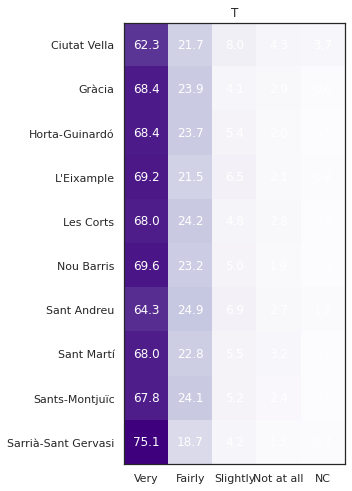

In [40]:
df_ = df_t.copy()
att_name = 'Nom_Districte_Educatiu'
m,lev,att = sat_dataprep(df_, att_name)

sat_plot(m,lev,att)

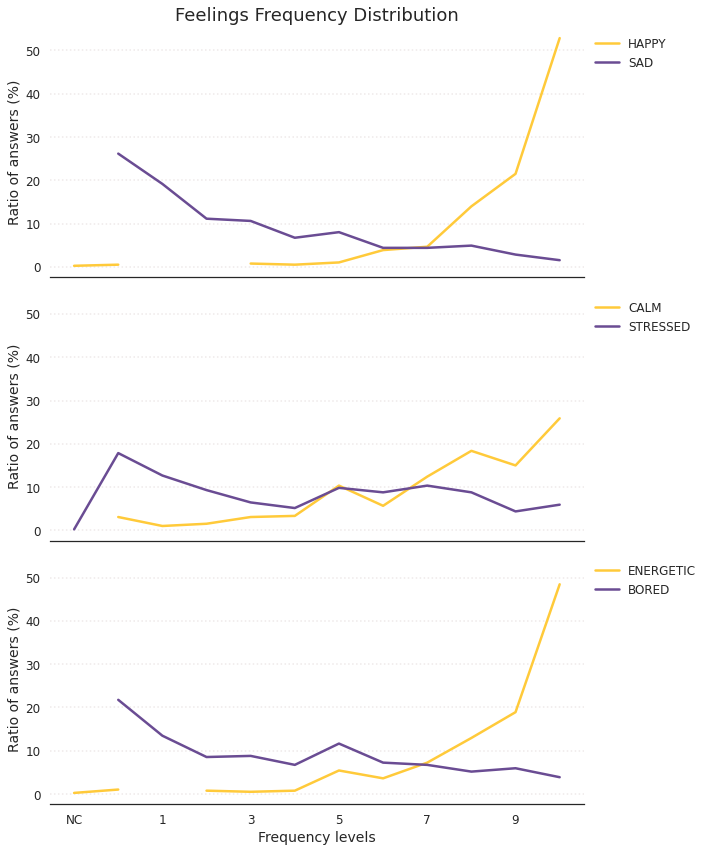

In [41]:
def f_dist_plot1(df_):
    df_ = df_.rename(columns=f_labels)
    pairs = [['HAPPY','SAD'],['CALM','STRESSED'], ['ENERGETIC','BORED']]

    fig,axs = plt.subplots(ncols=1, nrows=3, figsize=(10,12), sharey=True, sharex=True)
    for ax,pair in zip(axs,pairs):
        df_.loc[:,pair].plot(ax=ax, lw=2.5, fontsize=12, color=[colors[3], colors[0]])

        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)

        ax.grid(axis='y', color='#eee9e9', linestyle='dotted', linewidth=1.5)
        ax.legend(bbox_to_anchor=(1,1), loc="upper left", frameon=False, fontsize='medium')
        ax.set_xlabel("Frequency levels", fontsize=14)
        ax.set_ylabel("Ratio of answers (%)", fontsize=14)
        # ax.legend(frameon=False, fontsize='medium')

    axs[0].set_title("Feelings Frequency Distribution", fontsize=18)

    # plt.savefig('f_dist.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()


f_dist_plot1(f_df)

In [42]:
# TRYING TO ADAPT TO SELECT NEIHBORHOODS: 
# problem: in stack bar not all nbh have all levels and feelins, would mean spots in the stack bar
# try again with aggregated neigborhoods, could work with less levels:

def f_dataprep(f_freq, ret_dic=True, sel_ngb=False, ngb=0):
    # Creating a dictionary with the levels to generate stacked bar
    levels = ['NC']+[str(n) for n in range(0,11)]
    dic = {level:[] for level in levels}

    # Creating a dataframe with the levels for bokeh
    df_ = pd.DataFrame(index=levels, columns=feelings)
    df_ = df_.fillna(np.nan)

    if sel_ngb:
        f_freq_ng = f_freq[f_freq.Codi_Districte_Educatiu==ngb]
        for feeling in feelings:
            ratio = f_freq_ng[feeling].value_counts(normalize=True)*100
            df_[feeling] = ratio
            for level in levels:
                if level in ratio.index:
                    dic[level].append(ratio[level])
                else:
                    pass
    else:
        pass
        for feeling in feelings:
            ratio = f_freq[feeling].value_counts(normalize=True)*100
            for level in levels: 
                dic[level].append(ratio[level])
                df_[feeling] = ratio

    # for feeling in feelings:
    #     ratio = f_freq[feeling].value_counts(normalize=True)*100
    #     for level in levels: 
    #         # dic[level].append(ratio[level])
    #         df_[feeling] = ratio
    
    if ret_dic:
        return(dic)
    else:
        return(df_)

KeyError: "None of [Index(['CALM', 'ENERGETIC', 'HAPPY'], dtype='object')] are in the [columns]"

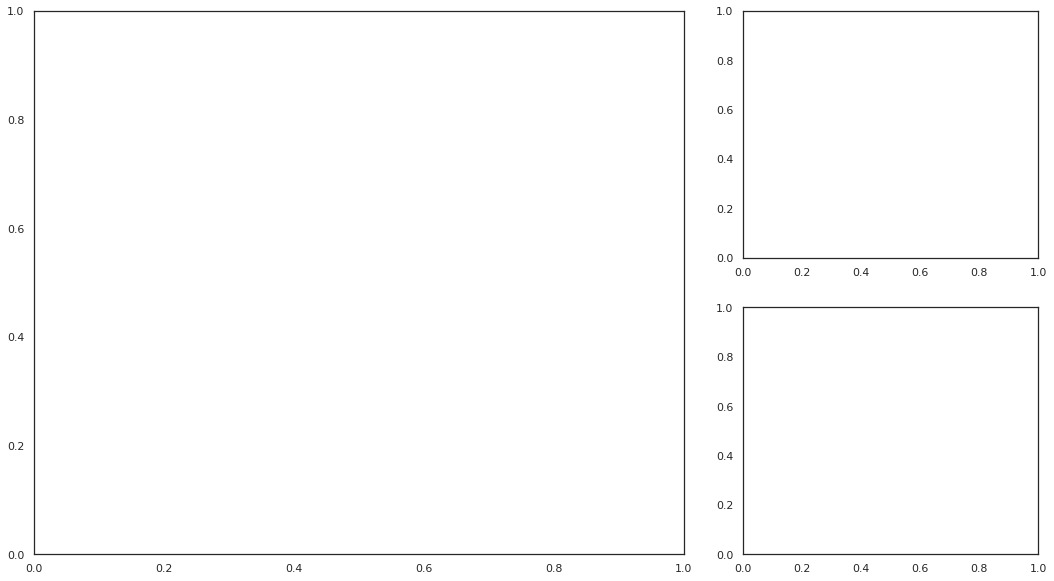

In [43]:
# CONSOLIDATE PLOTS

plt.figure(figsize=(18, 10))

import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


# GRID SPEC Definition
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[:, :-1])
# ax2 = plt.subplot(gs[0, 2])
# ax3 = plt.subplot(gs[1, 2])
ax2 = plt.subplot(gs[0, 2], visible=True) # ¿ why the y axis are not appearing ?
ax3 = plt.subplot(gs[1, 2], sharey=ax2, visible=True)
plt.setp(ax2.get_yticklabels(), visible=True)

# STACKED PLOT

# DISTRIBUTION PLOTS
df_.loc[:,feelings_names[3:]].plot(ax=ax2, lw=2.5, fontsize=12, style={'CALM': '--c', 'ENERGETIC': ':c', 'HAPPY': 'b'})
df_.loc[:,feelings_names[:3]].plot(ax=ax3, lw=2.5, fontsize=12 , style={'BORED': '--c', 'STRESSED': ':c', 'SAD': 'b'})

for ax in [ax2,ax3]:
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_major_locator(MultipleLocator(10))

    ax.grid(axis='y', color='#eee9e9', linestyle='dotted', linewidth=1)
    ax.legend(frameon=False, fontsize='medium')

plt.tight_layout()

In [ ]:
f_freq_num = f_freq.copy()
for c in feelings:
    f_freq_num[c] = f_freq_num[c].replace('NC', None)
    f_freq_num[c] = pd.to_numeric(f_freq_num[c])

In [ ]:
f_freq_nb = f_freq_num.groupby(['Nom_Districte_Educatiu']).agg('mean').reset_index()

In [ ]:
# By neighborhood
f_freq_nb.head()

,Nom_Districte_Educatiu,f_felicitat,f_energia,f_calma,f_avorriment,f_estres,f_tristesa
0,Ciutat Vella,8.944598,8.587258,7.116343,3.833795,4.027701,3.083102
1,Gràcia,8.873156,8.734513,7.017699,3.899705,4.504425,2.961652
2,Horta-Guinardó,8.954082,8.739796,7.155612,3.755102,4.487245,3.102041
3,L'Eixample,9.020725,8.658031,7.414508,3.668394,4.163212,2.782383
4,Les Corts,9.075567,8.725441,6.685139,3.430730,4.060453,2.705290


In [ ]:

# I was planning to plot the plot above for each neigborhood separaetly, but maybe is too much info. 
# And perhaps makes sense to do it directly in bokeh / other solutions to allow already selecting the niehborhood

# PLOAR>> http://worldshap.in/#/01/DK/ES/

In [ ]:
# POLAR GRAPH

In [ ]:
# 42. To what extent are you satisfied or satisfied with everyone of these things of your life?
# 47. To what extent are you satisfied these things about your life?

-------------

In [ ]:

# https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib


def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels

    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [ ]:
# Satisfaction by neigbourhood on the free time
cols = ['Nom_Districte_Educatiu', 's_ustemps']
s_time = df[cols].copy()
# s_time['s_ustemps'] = s_time['s_ustemps'].astype(int)

s_time['s_ustemps'].unique()
# s_time.isna().sum()
# s_time.dropna()


# .astype(str).astype(int)
# s_time.info()
# s_time_us = s_time.groupby('Nom_Districte_Educatiu').mean()
# .agg({'s_ustemps':'median','s_tempslliure':'median'})
# s_time.info()

array(['8', '7', '10', '9', '4', '6', '5', nan, '2', '3', '1', 'NC', '0'],
      dtype=object)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>